<a href="https://colab.research.google.com/github/paulsoumyadip/topic_modelling_on-_BBC_articles/blob/main/Topic_modelling_on_BBC_news_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME: TOPIC MODELLING ON BBC NEWS ARTICLE**

*** ***
*  ##### **Project Type**    - Unsupervised
*  ##### **Contribution**    - Team
*  ##### **Team Member 1 -** Soumyadip Paul 
*  ##### **Team Member 2 -** Aishwarya K P
*  ##### **Team Member 3 -** Akshat Raj Kumawat


*******
* # **Github LINK-**

* Enter
* Link
* Here

# **PROJECT SUMMARY:**

Enter contributions here

# **PROBLEM DESCRIPTION:**

BBC stands for British Broadcasting Corporation.

It is an operational business division of the British Broadcasting Corporation (BBC) responsible for the gathering and broadcasting of news and current affairs in the UK and around the world. The department is the world's largest broadcast news organisation and generates about 120 hours of radio and television output each day, as well as online news coverage.

The service maintains 50 foreign news bureaus with more than 250 correspondents around the world.

BBC News Online is the BBC's news website. It is one of the most popular news websites in the UK, reaching over a quarter of the UK's internet users, and worldwide, with around 14 million global readers every month.

The website contains international news coverage as well as articles based on entertainment, sport, science, and political news.

In this project the task is to identify major themes/topics across a collection of BBC news articles.

# **BUSINESS CONTEXT:**
* The BBC is one of the world's largest and most respected news organizations, providing news, information, and analysis to a global audience. However, with a vast amount of news articles published every day, it can be challenging for readers to quickly and efficiently find articles on specific topics of interest.
* To address this issue we can create a machine learning (ML) model that can automatically identify the topics of each article and categorize them accordingly. This model would be trained on a vast corpus of BBC news articles and use advanced natural language processing (NLP) techniques to extract key topics and themes from the text.
* This would enhance the user experience, making it easier for readers to find relevant articles and stay up-to-date on the latest news in their areas of interest.
* Additionally, the topic model could be used internally by the BBC's editorial team to assist with content curation and to identify emerging trends and themes in the news. This would help the BBC to provide more timely and relevant coverage of the topics that matter most to its audience.

*Data-Set used from the publication: - D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.*

# **DATA PREPARATION:**

In [1]:
# mounting the drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

*The dataset in this case isn't collective, its been stored in form of numerous text files sub-categorized in 5 different domains. Hence, for loading the data we'll visit all text files individually and copy all articles to a dataframe along with their category.*

In [3]:
# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Unsupervised Capstone/Data Sets/bbc'

# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Create dataframe for gathering the articles
bbc = pd.DataFrame()
 
# Iterate over sub-directories to access the text files
for subdir in subdirs:

  # address to the subdirectory
  dir = directory + '/' + subdir

  # Iterate over all the text files present in a sub-directory
  for filename in os.listdir(dir):
    
    # Get file address
    filepath = os.path.join(dir, filename)

    # Traversing over text files and storing the articles into the dataframe
    try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']
      
      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')
      
      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

    # Ignore exception, if any
    except:
      pass    

*The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. There are over 2000 news article available in these categories.*

In [4]:
bbc.sample(10)

,Filename,Contents,Category
940,404,tory candidate quits over remark a conservati...,politics
81,440,us trade deficit widens sharply the gap betwe...,business
939,328,goldsmith: 'i was not leant on' the attorney ...,politics
1977,364,'podcasters' look to net money nasa is doing ...,tech
548,335,de niro film leads us box office film star ro...,entertainment
328,124,bargain calls widen softbank loss japanese co...,business
2174,213,search sites get closer to users search sites...,tech
1709,113,wright-phillips to start on right england coa...,sport
815,122,dance music not dead says fatboy dj norman co...,entertainment
311,224,man utd to open books to glazer manchester un...,business


##### **The dataset consists of 4 columns:**

* *Index : Entry number*
* *Filname : Destination File Name/ Number*
* *Contents : Complete transcript of the article, the complete textual data*
* *Category : Article topic*

In [5]:
bbc.shape

(2224, 3)

*Let's check for duplicates cause having duplicates will result in inconsistencies*

In [6]:
bbc.duplicated(subset = ['Contents']).sum()

99

In [7]:
bbc.drop_duplicates(subset = ['Contents'],inplace = True)
bbc

,Filename,Contents,Category
0,485,swiss cement firm in buying spree swiss cemen...,business
1,499,china aviation seeks rescue deal scandal-hit ...,business
2,504,aids and climate top davos agenda climate cha...,business
3,505,china now top trader with japan china overtoo...,business
4,510,lacroix label bought by us firm luxury goods ...,business
...,...,...,...
2219,191,online commons to spark debate online communi...,tech
2220,219,disney backs sony dvd technology a next gener...,tech
2221,168,a decade of good website design the web looks...,tech
2222,164,who do you think you are? the real danger is ...,tech


# **DATA WRANGLING AND VISUALIZATION:**

*Let's add a column which shows us the number of words used in each article*

In [8]:
bbc['Contents_len'] = bbc['Contents'].str.len()

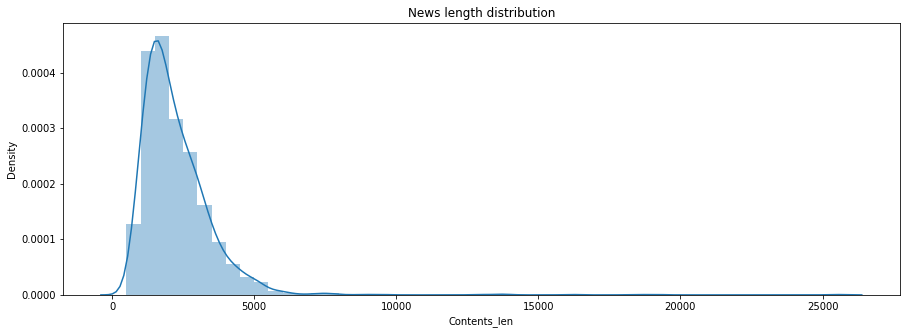

In [9]:
plt.figure(figsize=(15, 5))
sns.distplot(bbc['Contents_len']).set_title('News length distribution');

In [10]:
bbc

,Filename,Contents,Category,Contents_len
0,485,swiss cement firm in buying spree swiss cemen...,business,1501
1,499,china aviation seeks rescue deal scandal-hit ...,business,1381
2,504,aids and climate top davos agenda climate cha...,business,2715
3,505,china now top trader with japan china overtoo...,business,1485
4,510,lacroix label bought by us firm luxury goods ...,business,890
...,...,...,...,...
2219,191,online commons to spark debate online communi...,tech,3706
2220,219,disney backs sony dvd technology a next gener...,tech,1936
2221,168,a decade of good website design the web looks...,tech,3292
2222,164,who do you think you are? the real danger is ...,tech,5184


*Checking the number of Article per categories:* 

In [11]:
cat_count =bbc.groupby(['Category'],)['Category'].count()

Text(0.5, 1.0, 'Count per Category')

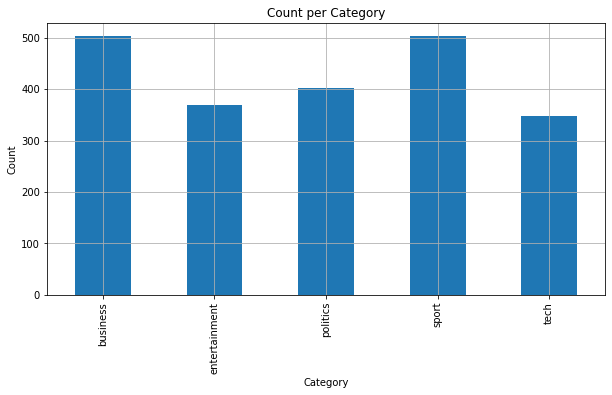

In [12]:
plt.figure(figsize=(10,5))
cat_count.plot(kind ='bar', grid =True)
plt.ylabel("Count")
plt.title("Count per Category")

##### **Let's Check the textual content of the Data:**

In [13]:
content = bbc.reset_index()
content = content['Contents']
content

0       swiss cement firm in buying spree  swiss cemen...
1       china aviation seeks rescue deal  scandal-hit ...
2       aids and climate top davos agenda  climate cha...
3       china now top trader with japan  china overtoo...
4       lacroix label bought by us firm  luxury goods ...
                              ...                        
2120    online commons to spark debate  online communi...
2121    disney backs sony dvd technology  a next gener...
2122    a decade of good website design  the web looks...
2123    who do you think you are?  the real danger is ...
2124    learning to love broadband  we are reaching th...
Name: Contents, Length: 2125, dtype: object

*Removing the punctuations from our corpuses*

In [14]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [15]:
bbc['Contents'] = bbc['Contents'].apply(remove_punctuation)
bbc.head(10)

,Filename,Contents,Category,Contents_len
0,485,swiss cement firm in buying spree swiss cemen...,business,1501
1,499,china aviation seeks rescue deal scandalhit j...,business,1381
2,504,aids and climate top davos agenda climate cha...,business,2715
3,505,china now top trader with japan china overtoo...,business,1485
4,510,lacroix label bought by us firm luxury goods ...,business,890
5,473,two nigerian banks set to merge nigerian bank...,business,964
6,466,high fuel costs hit us airlines two of the la...,business,1837
7,508,healthsouth exboss goes on trial the former h...,business,1401
8,481,christmas sales worst since 1981 uk retail sa...,business,2163
9,479,ford gains from finance not cars ford the us ...,business,2209


* **CountVectorizer(Top Words):**
 
In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called **Tokenization.**

These words then need to be encoded as integers, or floating-point values, such that they can be used as inputs in machine learning algorithms. *This process is called Feature Extraction (or Vectorization).*

In [16]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

*Removing stopword using NLTK:*

In [17]:
# dowloading nltk stopwords module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# extracting all stopwords for english language
stop = nltk.corpus.stopwords.words('english')
stop[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


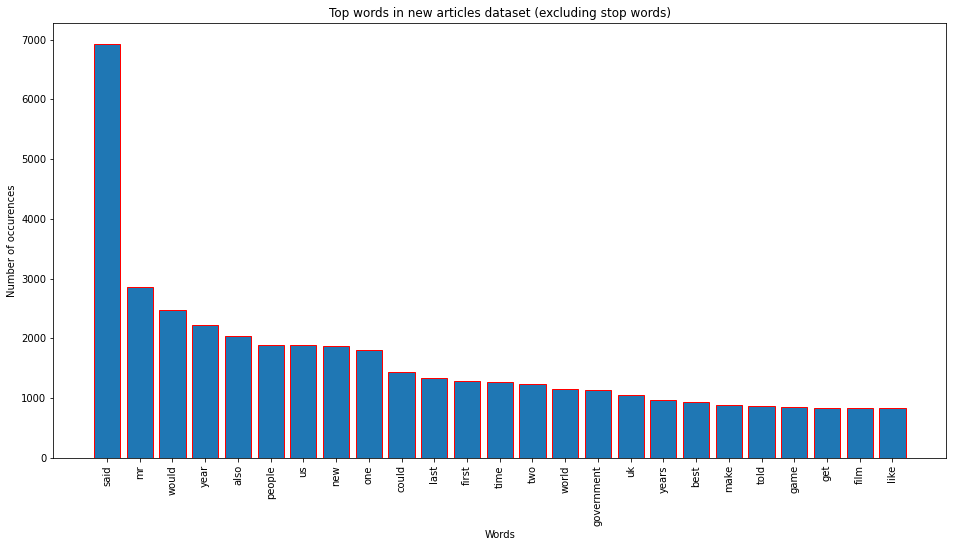

In [19]:
# creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stop)

# calling the function to get words and their counts
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=content)

# display top 25 words using bar plot
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values, edgecolor='red')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in new articles dataset (excluding stop words)')
ax.set_xlabel('Words')
ax.set_ylabel('Number of occurences')
plt.show()

Let's Create wordclouds for different topics:

In [20]:
from wordcloud import WordCloud ,STOPWORDS
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

#### **BUSINESS:**

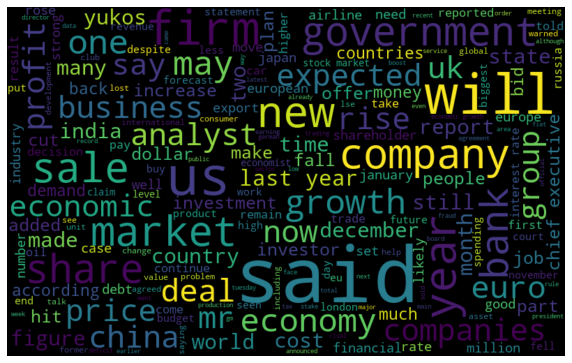

In [21]:
subset=bbc[bbc.Category=="business"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **ENTERTAINMENT:**

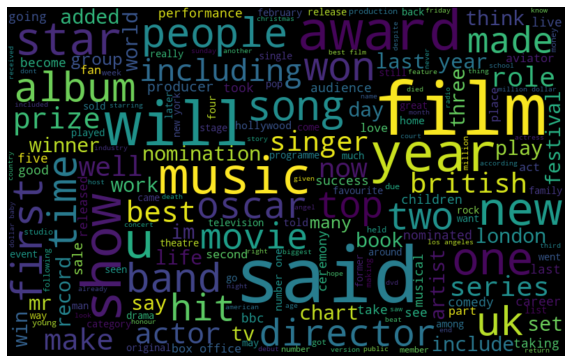

In [22]:
subset=bbc[bbc.Category=="entertainment"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **POLITICS:**

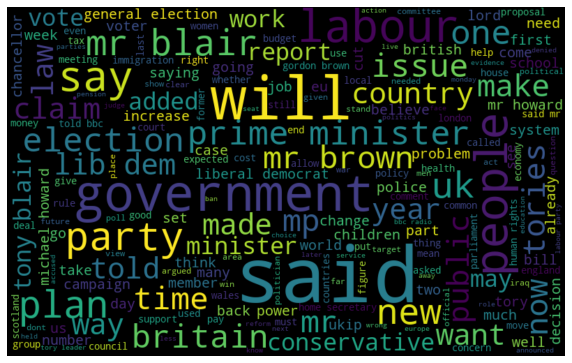

In [23]:
subset=bbc[bbc.Category=="politics"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **SPORTS:**


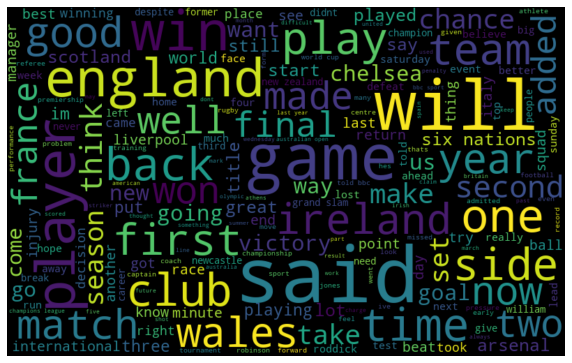

In [24]:
subset=bbc[bbc.Category=="sport"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)

#### **TECHNOLOGY:**

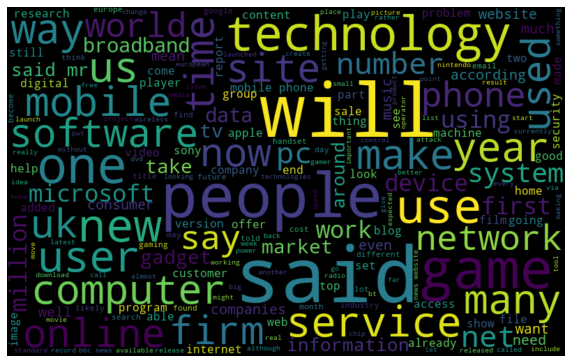

In [25]:
subset=bbc[bbc.Category=="tech"]
text=subset.Contents.values
words =" ".join(text)
create_wordcloud(words)


##### *STEMMING AND LEMMATIZING THE DATA*
* *Stemming:* is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

* *Lemmatization:* This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or lemma. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.

In [26]:
content

0       swiss cement firm in buying spree  swiss cemen...
1       china aviation seeks rescue deal  scandal-hit ...
2       aids and climate top davos agenda  climate cha...
3       china now top trader with japan  china overtoo...
4       lacroix label bought by us firm  luxury goods ...
                              ...                        
2120    online commons to spark debate  online communi...
2121    disney backs sony dvd technology  a next gener...
2122    a decade of good website design  the web looks...
2123    who do you think you are?  the real danger is ...
2124    learning to love broadband  we are reaching th...
Name: Contents, Length: 2125, dtype: object

In [27]:
# downloading wordNet lemmatizer
nltk.download(['wordnet','omw-1.4'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### **Vectorization:**


*Vectorization is a technique that converts the text content to numerical feature vectors. Bag of Words takes a document from a corpus and converts it into a numeric vector by mapping each document word to a feature vector for the machine learning model.*

In [28]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stop, max_features = 4000)

# text before vectorization 
text_sample = content
print('Content after removing Stopwords and Punctuations: \n{}'.format(text_sample[23]))

# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

# text after vectorization
print('Vectorization: \n{}'.format(document_term_matrix[23]))
     

Content after removing Stopwords and Punctuations: 
ecb holds rates amid growth fears  the european central bank has left its key interest rate unchanged at 2% for the 19th month in succession.  borrowing costs have remained on hold amid concerns about the strength of economic growth in the 12 nations sharing the euro, analysts said. despite signs of pick-up, labour markets and consumer demand remain sluggish, while firms are eyeing cost cutting measures such as redundancies. high oil prices, meanwhile, have put upward pressure on the inflation rate.  surveys of economists have shown that the majority expect borrowing costs to stay at 2% in coming months, with an increase of a quarter of a percentage point predicted some time in the second half of the year. if anything, there may be greater calls for an interest rate cut, especially with the euro continuing to strengthen against the dollar. "the euro land economy is still struggling with this recovery," said economist dirk schumacher. 

# **MODEL IMPLEMENTATION:**

## **Latent Dirichlet Allocation (LDA):**

---


Latent Dirichlet Allocation (LDA) algorithm is an unsupervised learning algorithm that attempts to describe a set of observations as a mixture of distinct categories. LDA is most commonly used to discover a user-specified number of topics shared by documents within a text corpus.

An advantage of the LDA technique is that one does not have to know in advance what the topics will look like. By tuning the LDA parameters to fit different dataset shapes, one can explore topic formation and resulting document clusters.

The goal of LDA is to map all the documents to the topics in a way, such that the words in each document are mostly captured by those imaginary topics.


* Will be using Latent Dirichlet Allocation for checking the latent features(topics) of our corpus
* We will be using pyLDAvis which allows a better visualization

* We will be using T-Sne for lowering down the dimensions of our feature-space
* We will tuning the hyper-parameters of LDA using RandomizedSearchCV

In [110]:
# hyperparameter tuning using Grid Search CV
grid_params = {'n_components' : [5]}

# creating LDA model object
lda = LatentDirichletAllocation(random_state = 23)

# fitting the model
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(document_term_matrix)

# best LDA model
best_lda_model = lda_model.best_estimator_
print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -649716.062235419
LDA model Perplexity on train data 1601.6094311751326


In [111]:
# installing pyLDAvis to visualize the results of LDA model
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
# importing pyLDAvis module
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [113]:
# generate and display the graph
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix, count_vectorizer, mds='tsne')
lda_panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      29.928135 -50.372833       1        1  29.861370
0      49.829922 -50.128242       2        1  19.875911
2      34.970367 -36.418987       3        1  17.504458
4      40.391277 -61.648132       4        1  17.367722
3      50.336933 -35.256439       5        1  15.390538, topic_info=            Term         Freq        Total Category  logprob  loglift
2377          mr  2823.000000  2823.000000  Default  30.0000  30.0000
1453        film   797.000000   797.000000  Default  29.0000  29.0000
1640  government  1124.000000  1124.000000  Default  28.0000  28.0000
482         best   900.000000   900.000000  Default  27.0000  27.0000
1570        game   839.000000   839.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2424         new   250.823758  1849.591894   Topic5  -5.4567  -0.1266
3960       world   229.871135  1154.307484   Topic5  -5.5440   0.2577
0            000   209.595141   749.204974   Topic5  -5.6363   0.5976
3987       years   213.346993   955.952383   Topic5  -5.6186   0.3716
3745          uk   211.192785  1042.436530   Topic5  -5.6287   0.2749

[376 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.369725    000
0         2  0.194873    000
0         3  0.017352    000
0         4  0.138814    000
0         5  0.280297    000
...     ...       ...    ...
3987      3  0.140174  years
3987      4  0.287671  years
3987      5  0.222814  years
3988      5  0.984531    yen
3997      1  0.996929  yukos

[766 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 5, 4])

In [114]:
# creating docterms dataframe
docterms = lda_panel.token_table.sort_values(by = ['Freq'], ascending=False)
     
# display docterms df
docterms 

,Topic,Freq,Term
term,,,
403,4,0.997899,awards
2643,2,0.997614,phones
861,1,0.997464,conservative
3791,2,0.997420,users
3997,1,0.996929,yukos
...,...,...,...
3745,3,0.001919,uk
3928,5,0.001688,win
1268,2,0.001657,england


In [115]:
# create topics dataframe
topicsdf = pd.DataFrame()
     

# adding top 50 most relevant terms for each topic to the dataframe
for i in range(1,6):
  Topicdict ={ "Topic":i, "Terms":list(docterms[docterms['Topic']==i]['Term'].head(50))  }
  topicsdf=topicsdf.append(Topicdict,ignore_index=True)
topicsdf

,Topic,Terms
0,1.0,"[conservative, yukos, tory, mps, chancellor, i..."
1,2.0,"[phones, users, spam, mobiles, broadband, site..."
2,3.0,"[chelsea, holmes, mourinho, athletics, striker..."
3,4.0,"[awards, actress, comedy, actor, hollywood, co..."
4,5.0,"[seed, exports, profits, nissan, recession, ba..."


### **TOPIC 1 : POLITICS**

In [116]:
# creating term freq dict for topic 1
t1dict = {}
for vals in docterms[docterms['Topic']==1].head(40).values:
  t1dict[vals[2]] =vals[1]
t1dict

{'conservative': 0.997464414861909,
 'yukos': 0.9969292909877053,
 'tory': 0.996704888618774,
 'mps': 0.9967007174592551,
 'chancellor': 0.9960373046401415,
 'iraq': 0.9953513384668828,
 'tories': 0.9952412583446645,
 'ministers': 0.9947810320067185,
 'lords': 0.9945742864626383,
 'lib': 0.9943904410457649,
 'liberal': 0.9943805848364187,
 'conservatives': 0.993789766552225,
 'mp': 0.9937875755737456,
 'blunkett': 0.9929257185500806,
 'parliament': 0.9922052250173692,
 'dems': 0.9915855897150964,
 'asylum': 0.9915739856975985,
 'democrats': 0.9909316659313676,
 'secretary': 0.9909030686255638,
 'immigration': 0.990348299686058,
 'terror': 0.9895265935277799,
 'prime': 0.989129347277857,
 'blair': 0.9885333602171482,
 'straw': 0.9884798125361941,
 'commons': 0.9873565609245814,
 'labour': 0.9868023589463462,
 'poverty': 0.9863884197385134,
 'dem': 0.9850259978022021,
 'gazprom': 0.9850196244640638,
 'terrorism': 0.9826699205017363,
 'election': 0.982539662005402,
 'parliamentary': 0.980

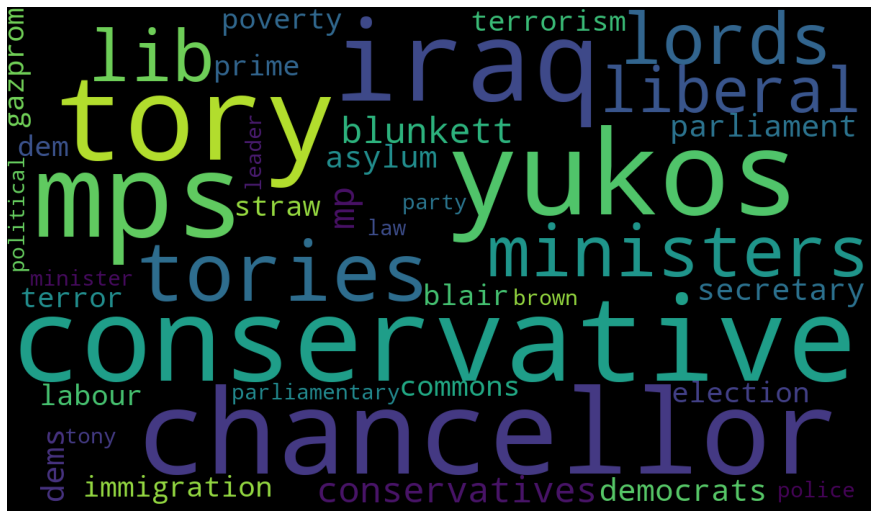

In [117]:
# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t1dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t1dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **TOPIC 2: TECH**

In [118]:
# creating term freq dict for topic 2
t2dict = {}
for vals in docterms[docterms['Topic']==2].head(40).values:
  t2dict[vals[2]] =vals[1]
t2dict

{'phones': 0.9976142792460575,
 'users': 0.9974198991108942,
 'spam': 0.9967673691457217,
 'mobiles': 0.996332788964872,
 'broadband': 0.9962983933283746,
 'sites': 0.9960632785975541,
 'programs': 0.9958787690886625,
 'computers': 0.9956462783205707,
 'images': 0.9954113269154674,
 'mobile': 0.9947548062074469,
 'networks': 0.9944476898906178,
 'devices': 0.9944317077794697,
 'software': 0.994417173305263,
 'web': 0.9941806376968435,
 'ukip': 0.9940732895657188,
 'apple': 0.9939125942676557,
 'kilroy': 0.9927331491409322,
 'operators': 0.9926977526114278,
 'bt': 0.9925293636331036,
 '3g': 0.991751833095864,
 'google': 0.9914568961169683,
 'silk': 0.9910062871399302,
 'computer': 0.9900288213606412,
 'windows': 0.9881865968842936,
 'pcs': 0.9879000218173609,
 'websites': 0.9873124654787847,
 'technologies': 0.9869559156865451,
 'wireless': 0.986390189250871,
 'machines': 0.9860845676729763,
 'phone': 0.9857875964260935,
 'gadgets': 0.9857744495523034,
 'microsoft': 0.9835920949873614,


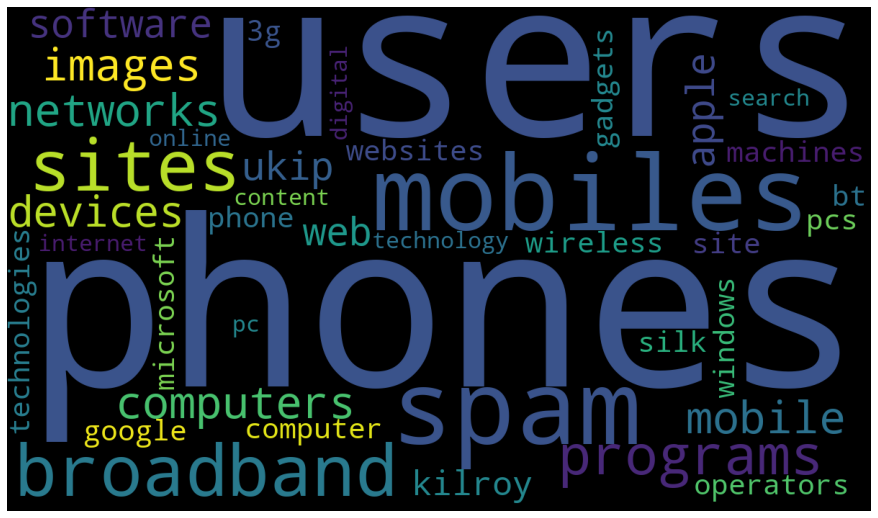

In [119]:
# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t2dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t2dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **TOPIC 3: SPORTS**

In [120]:
# creating term freq dict for topic 3
t3dict = {}
for vals in docterms[docterms['Topic']==3].head(40).values:
  t3dict[vals[2]] =vals[1]
t3dict

{'chelsea': 0.9961459837622644,
 'holmes': 0.995608291656532,
 'mourinho': 0.9951940440242812,
 'athletics': 0.9948052479531635,
 'striker': 0.9946181898546034,
 'glazer': 0.9944368830798724,
 'olympic': 0.9942540756649075,
 'arsenal': 0.9936618692118957,
 'sullivan': 0.9934111164683628,
 'liverpool': 0.9933138101185253,
 'championships': 0.9929953103744885,
 'ferguson': 0.9927176394244193,
 'indoor': 0.9925812049463286,
 'athens': 0.9908767914199736,
 'roddick': 0.9893261541507692,
 'cup': 0.9882347199150652,
 'champion': 0.987299949476832,
 'referee': 0.9815243707573319,
 'athletes': 0.9814837200399946,
 'thanou': 0.9814828372538248,
 'celtic': 0.9814777648534894,
 'gara': 0.9814666348835978,
 'wenger': 0.9814494940737031,
 'doping': 0.9814420453852256,
 'fa': 0.9814345697522597,
 'iaaf': 0.981420416725421,
 'ebbers': 0.9814153332540582,
 'kenteris': 0.9814135881475045,
 'nadal': 0.981407099221622,
 'worldcom': 0.9814046527145306,
 'gerrard': 0.9813491244066099,
 'champions': 0.97421

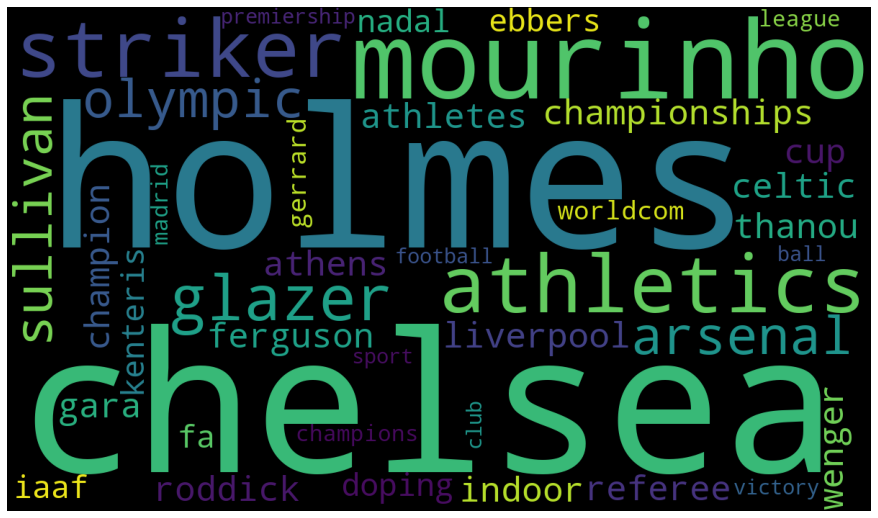

In [121]:
# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t3dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t3dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **TOPIC 4: ENTERTAINMENT**

In [122]:
# creating term freq dict for topic 4
t4dict = {}
for vals in docterms[docterms['Topic']==4].head(40).values:
  t4dict[vals[2]] =vals[1]
t4dict

{'awards': 0.9978990381883196,
 'actress': 0.9962925967518035,
 'comedy': 0.9961424139207943,
 'actor': 0.9951851713044962,
 'hollywood': 0.9949110426373838,
 'console': 0.9944432344050098,
 'chart': 0.994361497174658,
 'album': 0.9940013147716023,
 'theatre': 0.9937609437417702,
 'song': 0.9936493740384637,
 'film': 0.9935399692459416,
 'award': 0.9932033316181574,
 'aviator': 0.9930996174209789,
 'singer': 0.9926296348625252,
 'starring': 0.9919539036148907,
 'festival': 0.9918278649242253,
 'nintendo': 0.991726450989173,
 'los': 0.9910719020726738,
 'nominations': 0.9909833723751428,
 'oscar': 0.9900240498759662,
 'nominated': 0.9891326247328179,
 'robinson': 0.9889201642698089,
 'gamers': 0.9887874962441278,
 'academy': 0.9872024522975317,
 'musical': 0.9871616461635075,
 'angeles': 0.9852041797342866,
 'xbox': 0.9836158538922801,
 'oscars': 0.9829058559650693,
 'studio': 0.9806274497004873,
 'ds': 0.9793861608746015,
 'foxx': 0.9767733617268465,
 'prize': 0.9729823475168106,
 'roc

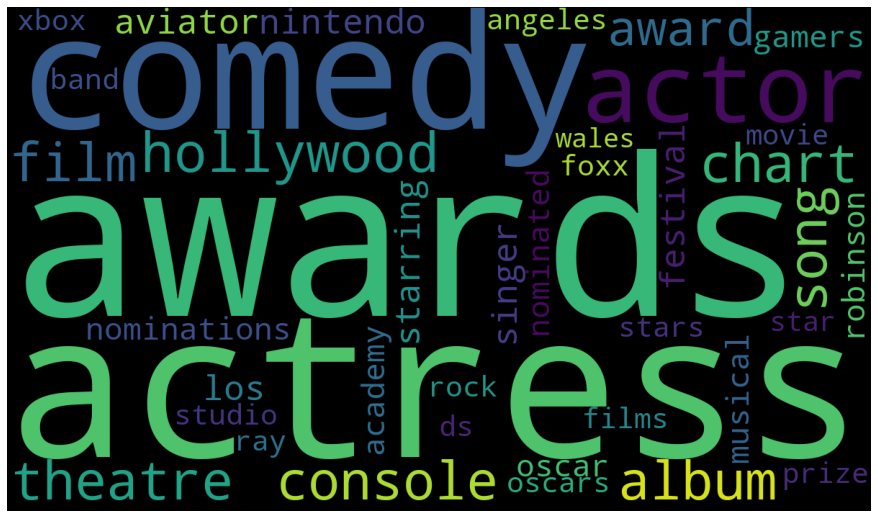

In [123]:
# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t4dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t4dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **TOPIC 5: BUSINESS**

In [124]:
# creating term freq dict for topic 5
t5dict = {}
for vals in docterms[docterms['Topic']==5].head(40).values:
  t5dict[vals[2]] =vals[1]
t5dict

{'seed': 0.9951166933105098,
 'exports': 0.9940176751930564,
 'profits': 0.9900104708414823,
 'nissan': 0.9850003648656986,
 'recession': 0.9848988572758934,
 'barclays': 0.9848662830579132,
 'retailers': 0.9848420773316612,
 'rupees': 0.9848360956100088,
 'mirza': 0.9848124620654368,
 'doubles': 0.9848031902784223,
 'imports': 0.9847931131760146,
 'safin': 0.9847018310429224,
 'lending': 0.9846877766160391,
 'gdp': 0.9846378559212804,
 'agassi': 0.9846362114593076,
 'economists': 0.9845959956905896,
 'slowdown': 0.9845621978177581,
 'yen': 0.9845308436758323,
 'gm': 0.984491846891307,
 'federer': 0.9844558673172576,
 'forecast': 0.9844434833274139,
 'currency': 0.9844350890942594,
 'economist': 0.9843934019339605,
 'shares': 0.984379223385638,
 'stock': 0.979198656633483,
 'china': 0.9784532490040212,
 'euros': 0.9783012687259314,
 'prices': 0.9709217081232975,
 'henman': 0.9665176548973875,
 'crude': 0.964768049451918,
 'moya': 0.9616645782385502,
 '7bn': 0.9616003897564764,
 'index'

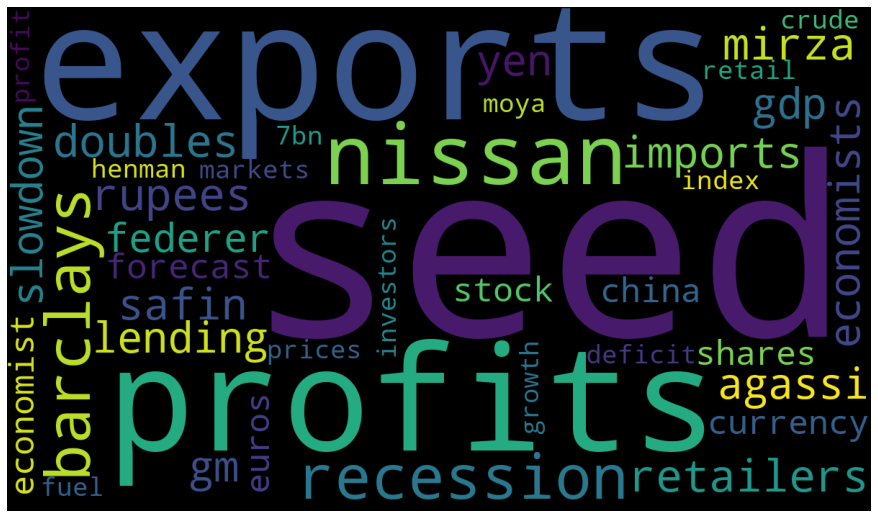

In [125]:
# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t5dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t5dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## **Latent Semantic Analysis (LSA):**

In [126]:
from sklearn.decomposition import TruncatedSVD

In [127]:
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=23)

svd_model.fit(document_term_matrix)

TruncatedSVD(n_components=5, n_iter=100, random_state=23)

### **TOPIC 1: TECH**

In [128]:
terms = count_vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:40]


sorted_terms[1]

('music', 0.2579520532515985)

In [129]:
terms = count_vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:40]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
said
 
mr
 
would
 
people
 
new
 
also
 
one
 
year
 
us
 
could
 
government
 
time
 
last
 
years
 
first
 
uk
 
music
 
like
 
two
 
world
 
labour
 
get
 
best
 
make
 
told
 
many
 
party
 
blair
 
way
 
think
 
bbc
 
game
 
election
 
well
 
made
 
next
 
good
 
back
 
take
 
much
 
Topic 1: 
best
 
music
 
song
 
years
 
25
 
last
 
game
 
angels
 
one
 
awards
 
like
 
year
 
robbie
 
think
 
first
 
urban
 
time
 
good
 
film
 
award
 
games
 
people
 
british
 
win
 
really
 
well
 
world
 
us
 
williams
 
songs
 
tv
 
play
 
great
 
even
 
stone
 
mobile
 
two
 
band
 
prize
 
album
 
Topic 2: 
mr
 
best
 
song
 
music
 
labour
 
blair
 
party
 
election
 
years
 
angels
 
25
 
brown
 
british
 
robbie
 
government
 
think
 
awards
 
urban
 
howard
 
minister
 
prime
 
kilroy
 
public
 
britain
 
silk
 
chancellor
 
award
 
songs
 
ukip
 
good
 
tory
 
leader
 
voted
 
last
 
forsyth
 
stone
 
tax
 
like
 
joss
 
tories
 
Topic 3: 
game
 
time
 
first
 
games
 
en

# **CONCLUSION:**